In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt  
import pandas as pd  
import numpy as np  
import config
from myfunc import timer
from myfunc import DirMan
import matplotlib
import geopandas as gpd
from pylab import rcParams
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs

# configuration
# resolution = "0p1"
resolution = "500"
region = [-180,180,-60,90]
data_path = f'/tera11/zhwei/students/Xionghui/data/run/{resolution}/'
post_data_path = '/tera11/zhwei/students/Xionghui/data/'
shp_path = '/tera11/zhwei/students/Xionghui/data/Shp/'
fig_path = f'/home/xuxh22/stu01/Bedrock/fig/{resolution}/'
path = '/home/xuxh22/stu01/Bedrock/'
if resolution == "0p1":
    size = 0.1
elif resolution == "500":
    size = 0.0005

font = {'family': 'Times New Roman'}
matplotlib.rc('font', **font)

params = {'backend': 'ps',
          'axes.labelsize': 25,
          'grid.linewidth': 0.2,
          'font.size': 25,
          'legend.fontsize': 18,
          'legend.frameon': False,
          'xtick.labelsize': 30,
          'xtick.direction': 'out',
          'ytick.labelsize': 30,
          'ytick.direction': 'out',
          'legend.handlelength': 1,
          'legend.handleheight': 1,
          'savefig.bbox': 'tight',
          'axes.unicode_minus': False,
          "mathtext.default":"regular",
          'text.usetex': False}
rcParams.update(params)

df = pd.read_csv(f'{data_path}csv/Global.csv')
shp = gpd.read_file(shp_path+'World_CN/ne_10m_admin_0_countries_chn.shp')

In [17]:
import random

df2 = df.copy()

df2['Continent_Together'] = df2['Continent'].replace(to_replace=['South America','North America'], value=['South \nAmerica','North \nAmerica']) 

df3 = pd.DataFrame()
df3['Continent_area'] = df2.groupby('Continent_Together')['Area'].sum().div(1e9)
df3 = df3[df3['Continent_area'] > 300]
df3 = df3.sort_values(by=['Continent_area'], ascending=False).reset_index(drop=False)
# print(df3)

list1 = df3.loc[:,'Continent_Together']
list2 = df3.loc[:,'Continent_area']
mapping = dict(zip(list1, list2))

df2 = df2[df2.Continent_Together.isin(list1)]
df2 = df2[df2['Continent_Together'].notna()]
df2['Continent_area'] = df2['Continent_Together'].map(mapping)
df2 = df2.sort_values(by=['Continent_area'], ascending=False).reset_index(drop=True)
order = df2['Continent_Together'].unique()
df2['Continent_Together'] = pd.Categorical(df2['Continent_Together'], categories=order, ordered=True)
# print(df2)

categories = df2['Continent_Together'].unique()
# values = [df2[df2['Continent_Together'] == cat]['Sbedrock'].values for cat in categories]
grouped = df2.groupby('Continent_Together')
# values = pd.concat([group.sample(min(10000, len(group))) for name, group in categories])
values = [group.sample(min(10000, len(group)))['Sbedrock'].values for name, group in grouped]
print(values)
del df2, df3, mapping, list1, list2


/tmp/ipykernel_633687/3446222075.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df2.groupby('Continent_Together')


[array([ 69.10657 ,  46.64593 ,  96.99841 , ...,   9.610745, 279.30362 ,
        47.436447]), array([115.76059 , 310.4144  , 254.23335 , ..., 131.66104 , 159.9501  ,
        21.722572]), array([ 76.71779 , 329.93958 ,  38.735733, ..., 278.3009  ,  91.536835,
       339.18835 ]), array([110.55556 , 365.63608 , 228.16933 , ...,  39.12067 , 212.1191  ,
        87.630226]), array([ 7.76672  , 19.533657 ,  5.7191668, ..., 59.672066 , 17.957891 ,
       66.987465 ]), array([ 27.167065,  82.61225 , 336.70734 , ..., 166.24924 ,  10.182955,
        80.909706])]


In [18]:
df2 = df.copy()

list1 = ['South America','Australia and New Zealand','Southern Africa','Eastern Africa' ,'Melanesia', 
        'Western Europe', 'Polynesia', 'Middle Africa','South-Eastern Asia', 'Western Africa', 
        'Southern Asia', 'Central America','Northern Africa', 'Caribbean', 'Western Asia', 
        'Eastern Asia','Northern America', 'Southern Europe', 'Central Asia', 'Eastern Europe',
        'Northern Europe']
list2 = ['South \nAmerica','Australia and \nNew Zealand','Southern \nAfrica','Eastern \nAfrica' ,'Melanesia', 
        'Western \nEurope', 'Polynesia', 'Middle \nAfrica','South-Eastern \nAsia', 'Western \nAfrica', 
        'Southern \nAsia', 'Central \nAmerica','Northern \nAfrica', 'Caribbean', 'Western \nAsia', 
        'Eastern \nAsia','Northern \nAmerica', 'Southern \nEurope', 'Central \nAsia', 'Eastern \nEurope',
        'Northern \nEurope']
mapping = dict(zip(list1, list2))
df2['Subregion_Together'] = df2['Subregion'].map(mapping).fillna(df2['Subregion'])

df3 = pd.DataFrame()
df3['Subregion_area'] = df2.groupby('Subregion_Together')['Area'].sum().div(1e9)
df3 = df3[df3['Subregion_area'] > 300]
df3 = df3.sort_values(by=['Subregion_area'], ascending=False).reset_index(drop=False)
# print(df3)

list1 = df3.loc[:,'Subregion_Together']
list2 = df3.loc[:,'Subregion_area']
mapping = dict(zip(list1, list2))

df2 = df2[df2.Subregion_Together.isin(list1)]
df2 = df2[df2['Subregion_Together'].notna()]
df2['Subregion_area'] = df2['Subregion_Together'].map(mapping)
df2 = df2.sort_values(by=['Subregion_area'], ascending=False).reset_index(drop=True)
order = df2['Subregion_Together'].unique()
df2['Subregion_Together'] = pd.Categorical(df2['Subregion_Together'], categories=order, ordered=True)
# print(df2)

categories2 = df2['Subregion_Together'].unique()
# values2 = [df2[df2['Subregion_Together'] == cat]['Sbedrock'].values for cat in categories2]
grouped = df2.groupby('Subregion_Together')
# values2 = pd.concat([group.sample(min(100000, len(group))) for name, group in categories2])
values2 = [group.sample(min(10000, len(group)))['Sbedrock'].values for name, group in grouped]
print(values2)
del df2, df3, mapping, list1, list2

/tmp/ipykernel_633687/1150758819.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df2.groupby('Subregion_Together')


[array([264.9069 ,  28.90944, 126.46842, ..., 184.0743 , 414.62262,
       332.37582]), array([ 20.020866,  86.46983 ,  28.577694, ...,  42.832607, 205.8271  ,
        18.803602]), array([116.48914, 159.86086,  63.96885, ..., 173.30675, 206.16423,
       197.21176]), array([ 57.438198,  60.521027,  52.52314 , ...,  43.773846, 110.626625,
       134.37944 ]), array([64.615364, 52.271603, 94.39049 , ..., 30.592897, 20.779398,
       64.38811 ]), array([ 56.361633,  22.686495, 112.0386  , ..., 430.68973 , 258.4748  ,
        83.13597 ]), array([343.9319 , 129.68704, 185.62697, ..., 289.6577 , 456.19727,
       183.32263]), array([115.15251 ,  10.35349 ,  43.815662, ..., 126.10981 , 131.07649 ,
       201.43494 ]), array([190.32144,  65.07635, 119.44492, ..., 322.23575, 182.4813 ,
        71.67883]), array([217.15546, 241.28194, 216.19344, ..., 299.48187, 100.18342,
       252.18724]), array([277.20477 , 318.60397 , 304.12698 , ...,  28.788452, 343.27063 ,
       400.82623 ]), array([ 34.9

In [19]:
df2 = df.copy()

list1 = ['United States of America','Democratic Republic of the Congo','Central African Republic']
list2 = ['America','Congo*','Central \nAfrican Republic']
mapping = dict(zip(list1, list2))
df2['Sovereignt_Together'] = df2['Sovereignt'].map(mapping).fillna(df2['Sovereignt'])

df3 = pd.DataFrame()
df3['Sovereignt_area'] = df2.groupby('Sovereignt_Together')['Area'].sum().div(1e9)
df3 = df3[df3['Sovereignt_area'] > 300]
df3 = df3.sort_values(by=['Sovereignt_area'], ascending=False).reset_index(drop=False)
# print(df3)

list1 = df3.loc[:,'Sovereignt_Together']
list2 = df3.loc[:,'Sovereignt_area']
mapping = dict(zip(list1, list2))

df2 = df2[df2.Sovereignt_Together.isin(list1)]
df2 = df2[df2['Sovereignt_Together'].notna()]
df2['Sovereignt_area'] = df2['Sovereignt_Together'].map(mapping)
df2 = df2.sort_values(by=['Sovereignt_area'], ascending=False).reset_index(drop=True)
order = df2['Sovereignt_Together'].unique()
df2['Sovereignt_Together'] = pd.Categorical(df2['Sovereignt_Together'], categories=order, ordered=True)
# print(df2)

categories3= df2['Sovereignt_Together'].unique()
# values3 = [df2[df2['Sovereignt_Together'] == cat]['Sbedrock'].values for cat in categories3]
grouped = df2.groupby('Sovereignt_Together')
# values3 = pd.concat([group.sample(min(100000, len(group))) for name, group in categories])
values3 = [group.sample(min(10000, len(group)))['Sbedrock'].values for name, group in grouped]
print(values3)
del df2, df3, mapping, list1, list2

/tmp/ipykernel_633687/3200775058.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df2.groupby('Sovereignt_Together')


[array([  5.5975685,  43.753063 ,  31.599913 , ..., 107.5204   ,
        23.0019   ,  14.550583 ]), array([400.7705  , 325.67227 ,   5.360189, ..., 159.78198 , 223.34775 ,
       359.1941  ]), array([ 76.7608 ,  74.66263, 136.17203, ...,  81.1292 , 138.7864 ,
       163.91562]), array([141.77005 , 163.52678 ,  31.906284, ...,   9.814074,  40.419556,
       135.84    ]), array([ 49.37653 , 223.7629  ,   6.970901, ...,  65.07538 ,  34.517036,
        87.95654 ]), array([306.1963  , 189.19325 , 182.20677 , ...,  81.505165, 153.63303 ,
       203.44975 ]), array([138.2896  , 238.15475 ,  25.773075, ..., 292.70465 , 426.02542 ,
       338.05762 ]), array([126.97102 ,  31.422392,  24.779951, ...,  45.655273,  91.232475,
        27.798735]), array([289.96768 ,  48.477886, 360.63068 , ..., 205.43143 , 198.87613 ,
       194.53737 ]), array([ 92.07651, 233.14326, 139.03314, ..., 113.21071, 234.97682,
       203.40547]), array([ 51.73823  ,  38.91752  ,   1.078852 , ...,   4.5399666,
       125.

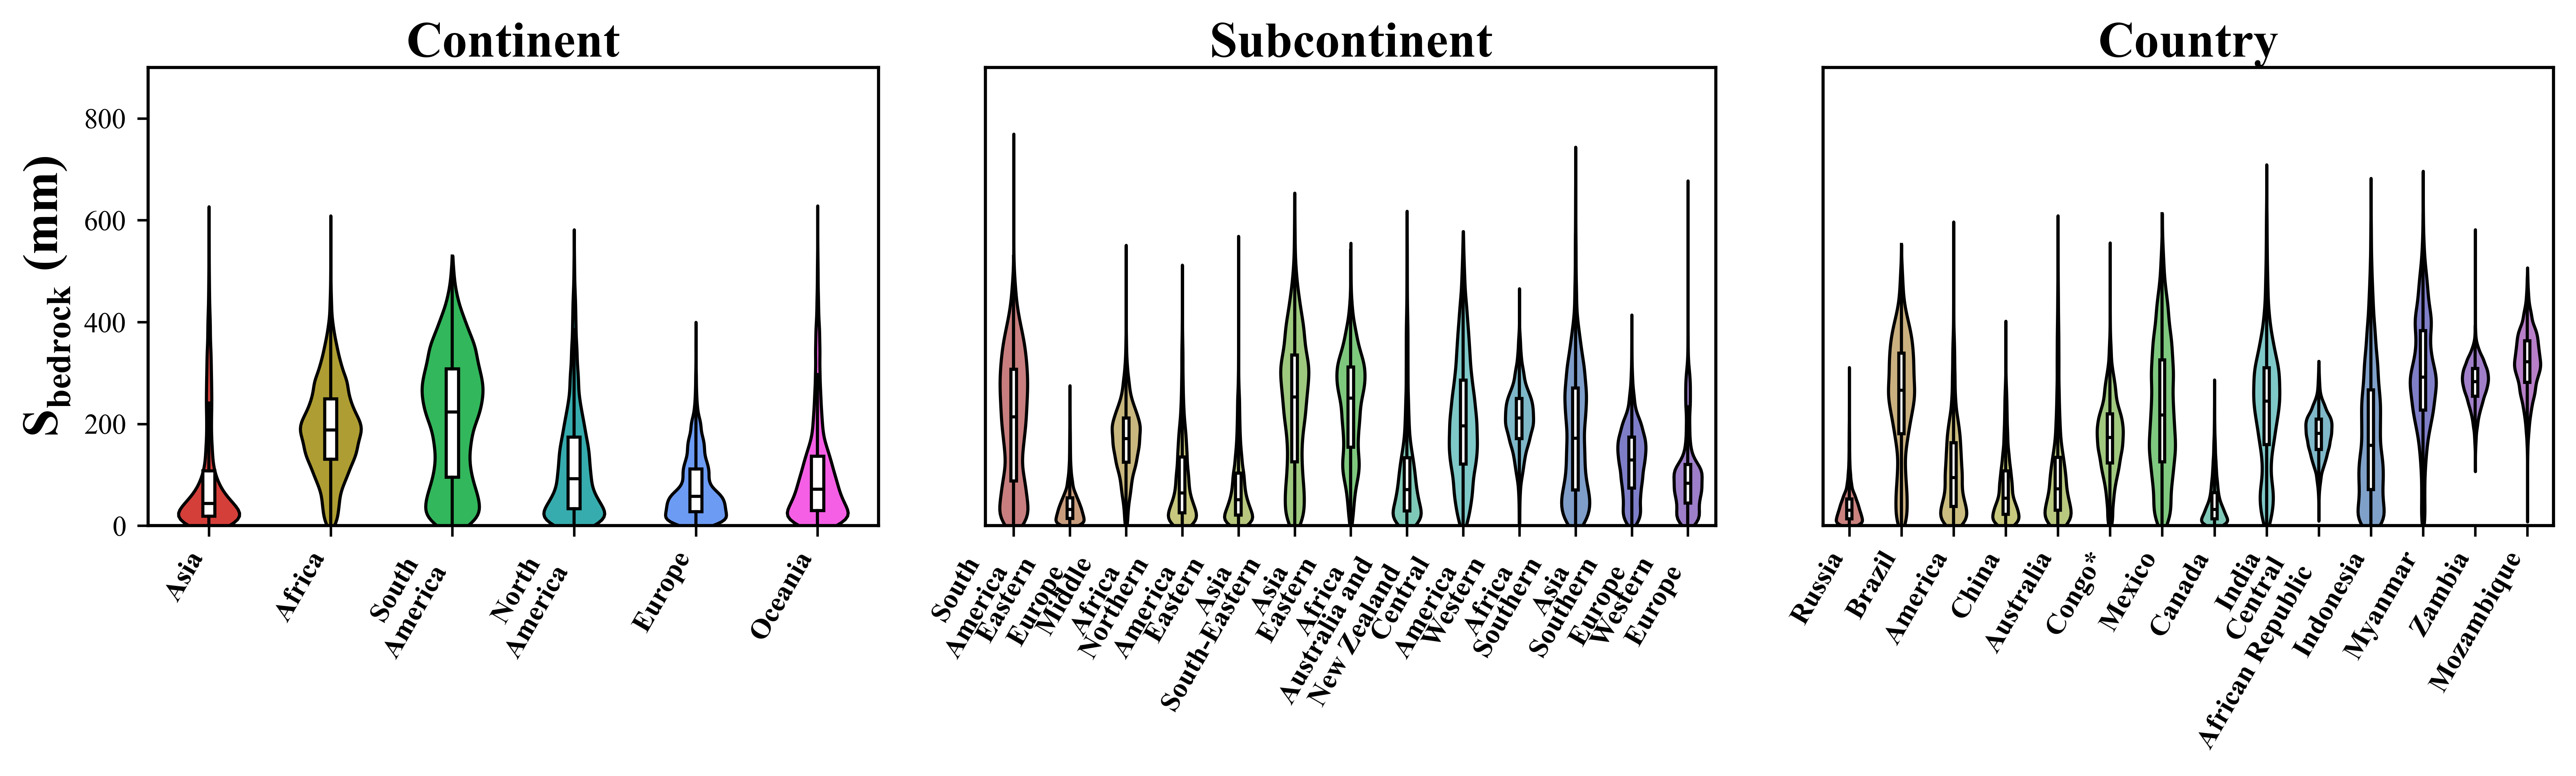

In [20]:
fig, ax = plt.subplots(figsize=(12, 4), dpi=600) 
fig.subplots_adjust(left=0, right=1, 
                bottom=0, top=1, wspace=-0.8) 
gs = GridSpec(1, 3, figure=fig)

ax.set_axis_off()

ax1 = fig.add_subplot(gs[0, 0])
colors = ['#D43F3A', '#ae9d32', '#32b75c', '#36acae', '#6c9bf4', '#f55fe5']
# colors = ['#f8de85', '#FAC13E','#a5537f','#a52653',
#                '#c04a02','#A4B381','#52B33F','#74B3B8',
#                '#B183B8','#7846A8']
# 3. 绘制小提琴图
violin_parts = ax1.violinplot(values, showmeans=False, showmedians=False, showextrema=False)
for i,pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(colors[i])  # 设置填充颜色
    pc.set_edgecolor('black')    # 设置边框颜色
    pc.set_linewidth(1)        # 设置边框粗细
    pc.set_alpha(1)            # 设置透明度
# 4. 绘制箱型图
box_parts = ax1.boxplot(values, widths=0.1, patch_artist=True)
for box in box_parts['boxes']:
    box.set_facecolor('white')   # 设置箱体填充颜色
    box.set_edgecolor('black')   # 设置箱体边框颜色
    box.set_linewidth(1)       # 设置箱体线条粗细
for median in box_parts['medians']:
    median.set_color('black')    # 设置中线颜色
    median.set_linewidth(1)    # 设置中线粗细
for whisker in box_parts['whiskers']:
    whisker.set_color('black')   # 设置须线颜色
    whisker.set_linewidth(1)   # 设置须线粗细
for cap in box_parts['caps']:
    cap.set_color('black')       # 设置端点颜色
    cap.set_linewidth(0)       # 设置端点粗细
for flier in box_parts['fliers']:
    flier.set_marker('')         # 隐藏异常点
# 5. 设置样式
ax1.set_ylim(0, 900)  # 动态设置 y 轴范围
ax1.set_yticks(np.arange(0,1000,200))  

ax1.set_xticks(range(1, len(categories) + 1))  # 设置 x 轴刻度位置
ax1.set_xticklabels(categories, fontsize=12, rotation=60, ha='right', fontweight='bold')  # 设置 x 轴刻度标签，旋转 60 度
ax1.set_ylabel('$S_{{bedrock}}$ (mm)', fontsize=16, fontweight='bold')  # 设置 y 轴标签，使用 LaTeX 格式
ax1.set_title('Continent', fontsize=16, pad=0, fontweight='bold')  # 设置标题和位置
for spine in ax1.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(1)  
ax1.tick_params(axis='both', labelsize=9)  # 设置刻度标签大小



ax2 = fig.add_subplot(gs[0, 1])
# colors = ['#A94A4A', '#F4D793', '#FFF6DA', '#889E73', 
#         '#5C7285', '#818C78', '#A7B49E', '#E2E0C8', 
#         '#474E93', '#7E5CAD', '#72BAA9', '#D5E7B5']
colors = ['#C87E7E', '#C89D7E', '#C8B77E', '#C8C87E', 
           '#B7C87E', '#9DC87E', '#7EC87E', '#7EC8B7', 
           '#7EC8C8', '#7EB7C8', '#7E9DC8', '#7E7EC8', 
           '#9D7EC8', '#B77EC8']
# 3. 绘制小提琴图
violin_parts = ax2.violinplot(values2, showmeans=False, showmedians=False, showextrema=False)
for i,pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(colors[i])  # 设置填充颜色
    pc.set_edgecolor('black')    # 设置边框颜色
    pc.set_linewidth(1)        # 设置边框粗细
    pc.set_alpha(1)            # 设置透明度
# 4. 绘制箱型图
box_parts = ax2.boxplot(values2, widths=0.1, patch_artist=True)
for box in box_parts['boxes']:
    box.set_facecolor('white')   # 设置箱体填充颜色
    box.set_edgecolor('black')   # 设置箱体边框颜色
    box.set_linewidth(1)       # 设置箱体线条粗细
for median in box_parts['medians']:
    median.set_color('black')    # 设置中线颜色
    median.set_linewidth(1)    # 设置中线粗细
for whisker in box_parts['whiskers']:
    whisker.set_color('black')   # 设置须线颜色
    whisker.set_linewidth(1)   # 设置须线粗细
for cap in box_parts['caps']:
    cap.set_color('black')       # 设置端点颜色
    cap.set_linewidth(0)       # 设置端点粗细
for flier in box_parts['fliers']:
    flier.set_marker('')         # 隐藏异常点
# 5. 设置样式
ax2.set_ylim(0, 900)  # 动态设置 y 轴范围
ax2.set_yticks([])  

ax2.set_xticks(range(1, len(categories2) + 1))  # 设置 x 轴刻度位置
ax2.set_xticklabels(categories2, fontsize=12, rotation=60, ha='right', fontweight='bold')  # 设置 x 轴刻度标签，旋转 60 度
# ax2.set_ylabel('$S_{{bedrock}}$ (mm)', fontsize=16)  # 设置 y 轴标签，使用 LaTeX 格式
ax2.set_title('Subcontinent', fontsize=16, pad=0, fontweight='bold')  # 设置标题和位置
for spine in ax2.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(1)  
ax2.tick_params(axis='both', labelsize=9)  # 设置刻度标签大小





ax3 = fig.add_subplot(gs[0, 2])
# colors = ['#A94A4A', '#F4D793', '#FFF6DA', '#889E73', 
#         '#5C7285', '#818C78', '#A7B49E', '#E2E0C8', 
#         '#474E93', '#7E5CAD', '#72BAA9', '#D5E7B5',
#         '#D5E7B5']
colors = ['#CA827F', '#CAB07F', '#CABD7F', '#C8C87F', 
           '#B8C87F', '#A0C87F', '#7FC87F', '#7FC8B8', 
           '#7FC8C8', '#7FB8C8', '#7FA0C8', '#7F7FC8', 
           '#A07FC8', '#B87FC8']
# 3. 绘制小提琴图
violin_parts = ax3.violinplot(values3, showmeans=False, showmedians=False, showextrema=False)
for i,pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(colors[i])  # 设置填充颜色
    pc.set_edgecolor('black')    # 设置边框颜色
    pc.set_linewidth(1)        # 设置边框粗细
    pc.set_alpha(1)            # 设置透明度
# 4. 绘制箱型图
box_parts = ax3.boxplot(values3, widths=0.1, patch_artist=True)
for box in box_parts['boxes']:
    box.set_facecolor('white')   # 设置箱体填充颜色
    box.set_edgecolor('black')   # 设置箱体边框颜色
    box.set_linewidth(1)       # 设置箱体线条粗细
for median in box_parts['medians']:
    median.set_color('black')    # 设置中线颜色
    median.set_linewidth(1)    # 设置中线粗细
for whisker in box_parts['whiskers']:
    whisker.set_color('black')   # 设置须线颜色
    whisker.set_linewidth(1)   # 设置须线粗细
for cap in box_parts['caps']:
    cap.set_color('black')       # 设置端点颜色
    cap.set_linewidth(0)       # 设置端点粗细
for flier in box_parts['fliers']:
    flier.set_marker('')         # 隐藏异常点
# 5. 设置样式
ax3.set_ylim(0, 900)  # 动态设置 y 轴范围
ax3.set_yticks([])  

ax3.set_xticks(range(1, len(categories3) + 1))  # 设置 x 轴刻度位置
ax3.set_xticklabels(categories3, fontsize=12, rotation=60, ha='right', fontweight='bold')  # 设置 x 轴刻度标签，旋转 60 度
# ax3.set_ylabel('$S_{{bedrock}}$ (mm)', fontsize=16)  # 设置 y 轴标签，使用 LaTeX 格式
ax3.set_title('Country', fontsize=16, pad=0, fontweight='bold')  # 设置标题和位置
for spine in ax3.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(1)  
ax3.tick_params(axis='both', labelsize=9)  # 设置刻度标签大小


# ax1.set_position([0, 0, 1/3, 1])
# ax2.set_position([1/3, 0, 1/3, 1])
# ax3.set_position([2/3, 0, 1/3, 1])

# 6. 设置透明背景
fig.patch.set_alpha(0)  # 设置整个图表的背景透明
# 7. 显示图表
plt.tight_layout()  # 调整布局
plt.show()

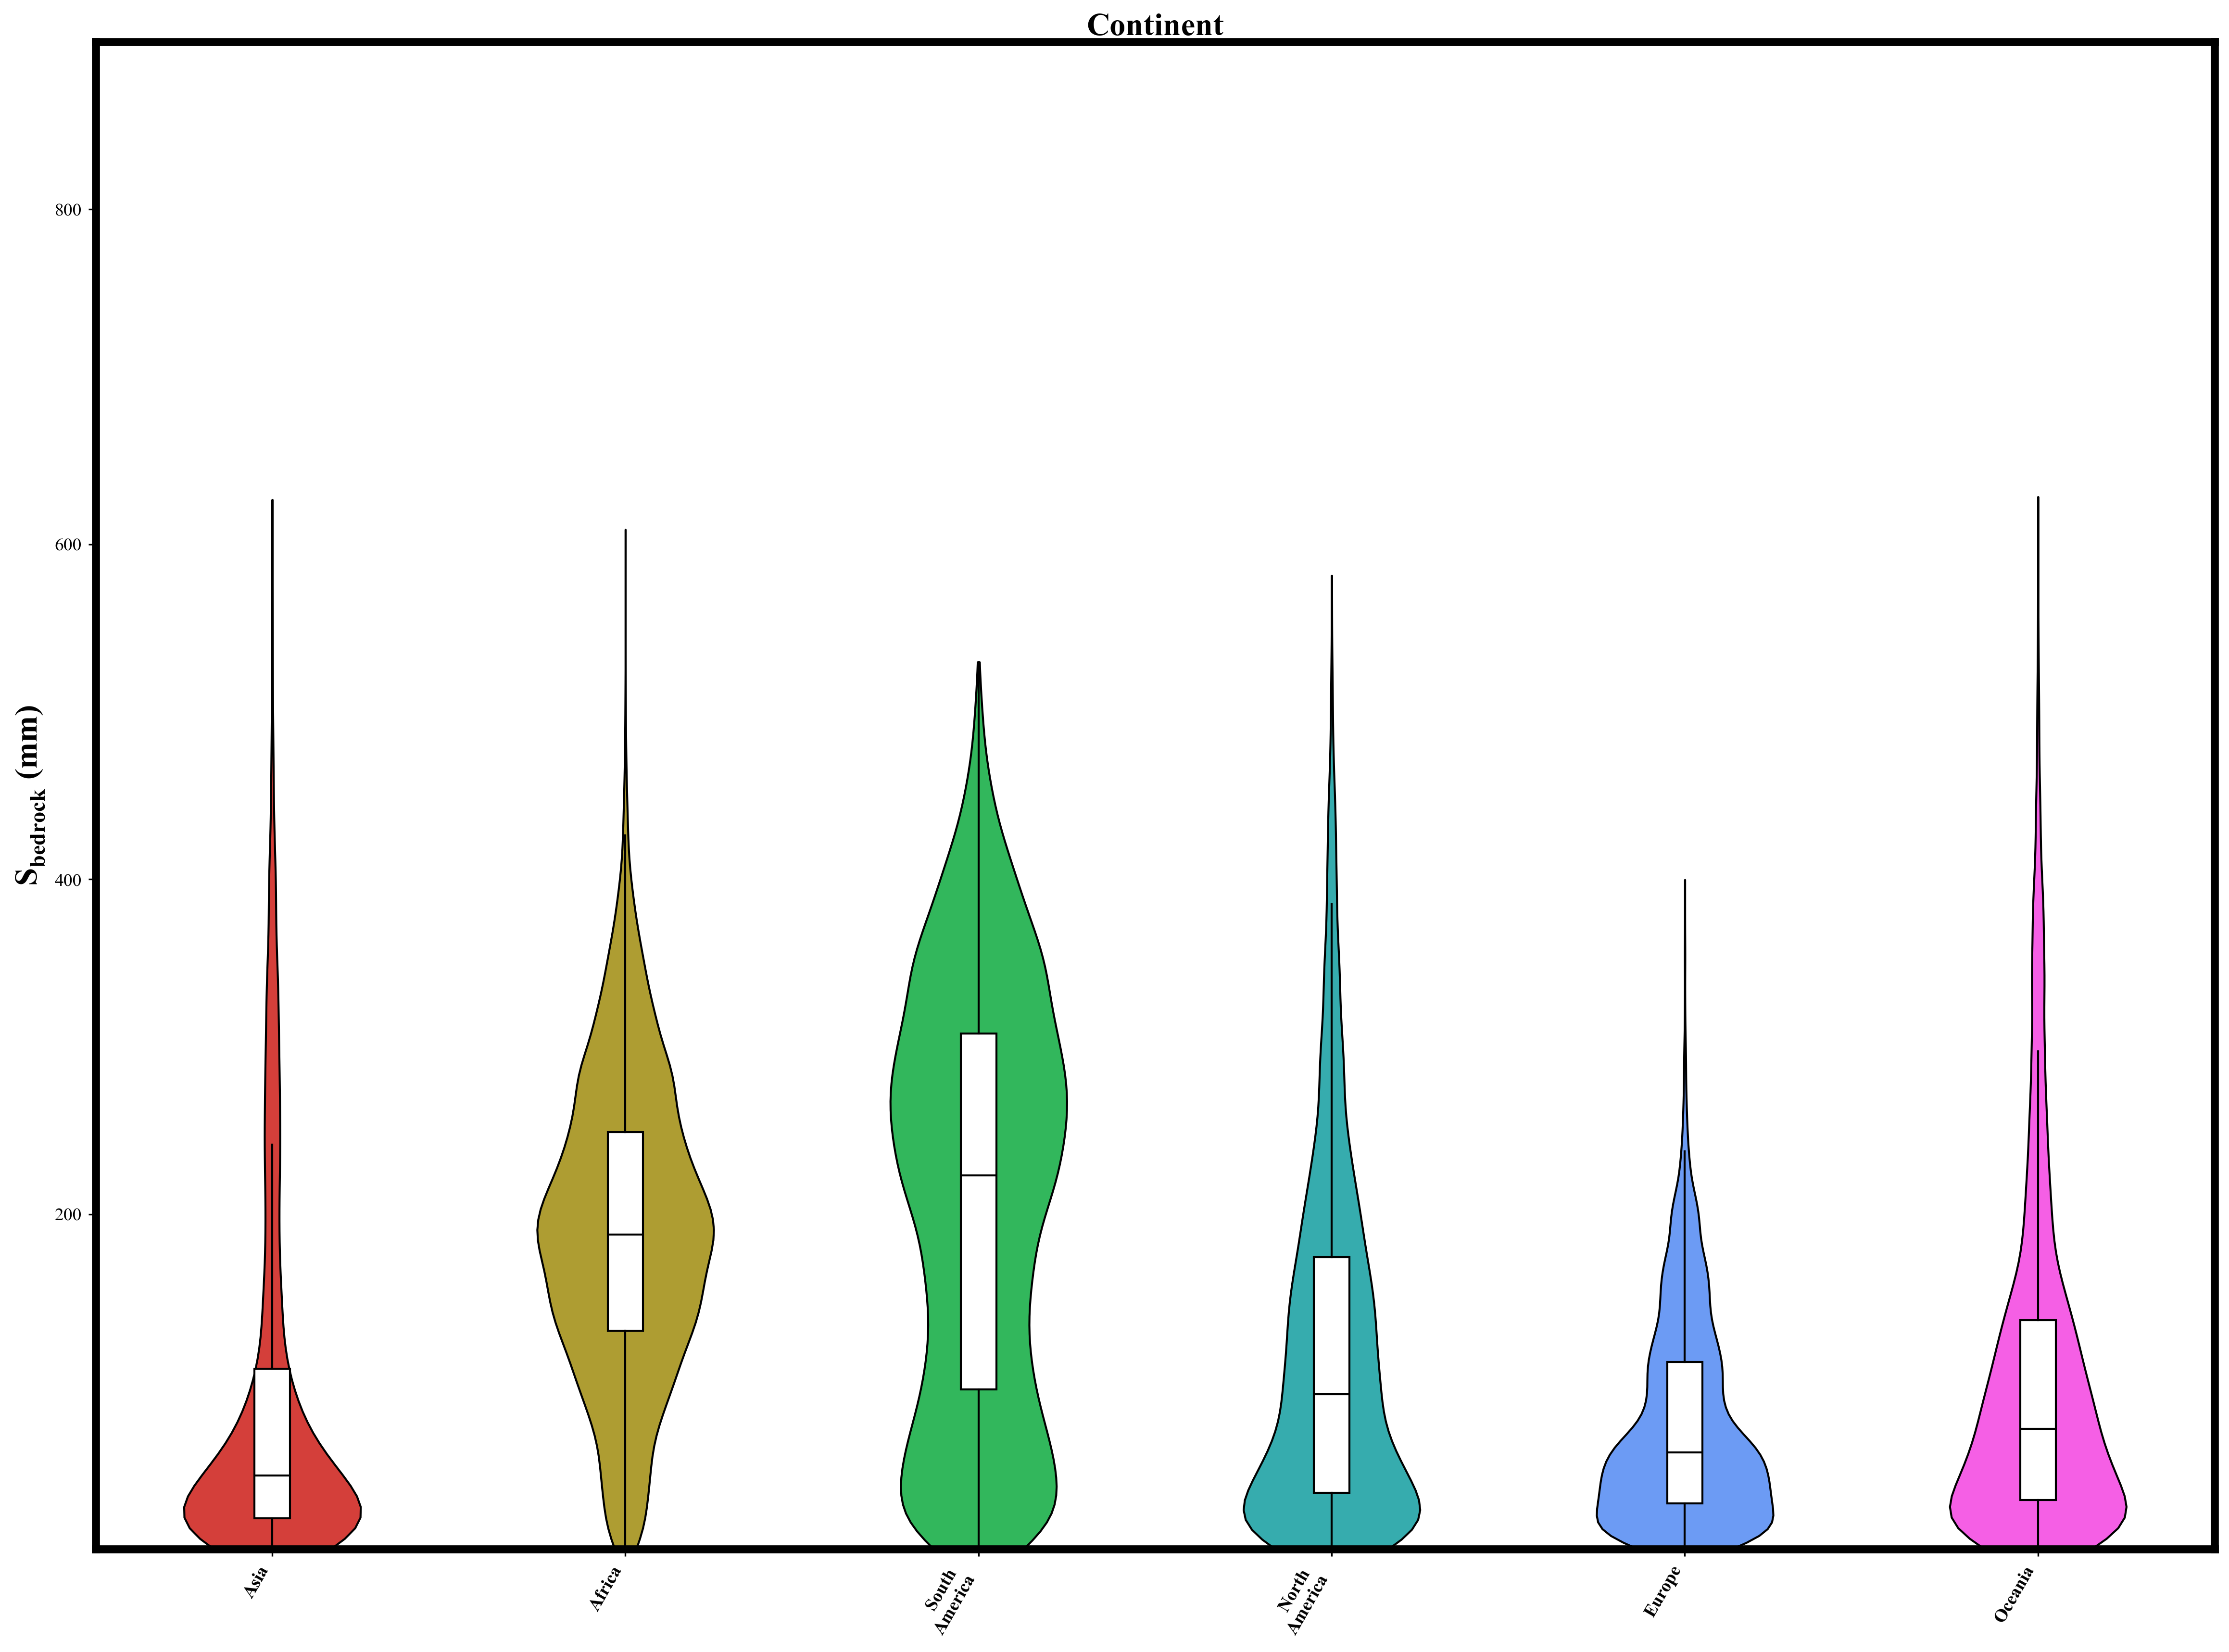

In [21]:
fig, ax = plt.subplots(figsize=(16, 12), dpi=300) 
fig.subplots_adjust(left=0, right=1, 
                bottom=0, top=1, wspace=0) 
gs = GridSpec(1, 3, figure=fig)

ax.set_axis_off()

ax1 = fig.add_subplot(gs[:, :])
colors = ['#D43F3A', '#ae9d32', '#32b75c', '#36acae', '#6c9bf4', '#f55fe5']
# colors = ['#f8de85', '#FAC13E','#a5537f','#a52653',
#                '#c04a02','#A4B381','#52B33F','#74B3B8',
#                '#B183B8','#7846A8']
# 3. 绘制小提琴图
violin_parts = ax1.violinplot(values, showmeans=False, showmedians=False, showextrema=False)
for i,pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(colors[i])  # 设置填充颜色
    pc.set_edgecolor('black')    # 设置边框颜色
    pc.set_linewidth(1)        # 设置边框粗细
    pc.set_alpha(1)            # 设置透明度
# 4. 绘制箱型图
box_parts = ax1.boxplot(values, widths=0.1, patch_artist=True)
for box in box_parts['boxes']:
    box.set_facecolor('white')   # 设置箱体填充颜色
    box.set_edgecolor('black')   # 设置箱体边框颜色
    box.set_linewidth(1)       # 设置箱体线条粗细
for median in box_parts['medians']:
    median.set_color('black')    # 设置中线颜色
    median.set_linewidth(1)    # 设置中线粗细
for whisker in box_parts['whiskers']:
    whisker.set_color('black')   # 设置须线颜色
    whisker.set_linewidth(1)   # 设置须线粗细
for cap in box_parts['caps']:
    cap.set_color('black')       # 设置端点颜色
    cap.set_linewidth(0)       # 设置端点粗细
for flier in box_parts['fliers']:
    flier.set_marker('')         # 隐藏异常点
# 5. 设置样式
ax1.set_ylim(0, 900)  # 动态设置 y 轴范围
ax1.set_yticks(np.arange(200,1000,200))  

ax1.set_xticks(range(1, len(categories) + 1))  # 设置 x 轴刻度位置
ax1.set_xticklabels(categories, fontsize=12, rotation=60, ha='right', fontweight='bold')  # 设置 x 轴刻度标签，旋转 60 度
ax1.set_ylabel('$S_{{bedrock}}$ (mm)', fontsize=16, fontweight='bold')  # 设置 y 轴标签，使用 LaTeX 格式
ax1.set_title('Continent', fontsize=16, pad=0, fontweight='bold')  # 设置标题和位置
for spine in ax1.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(4)  
ax1.tick_params(axis='both', labelsize=9)  # 设置刻度标签大小



# ax2 = fig.add_subplot(gs[0, 1])
# # colors = ['#A94A4A', '#F4D793', '#FFF6DA', '#889E73', 
# #         '#5C7285', '#818C78', '#A7B49E', '#E2E0C8', 
# #         '#474E93', '#7E5CAD', '#72BAA9', '#D5E7B5']
# colors = ['#C87E7E', '#C89D7E', '#C8B77E', '#C8C87E', 
#            '#B7C87E', '#9DC87E', '#7EC87E', '#7EC8B7', 
#            '#7EC8C8', '#7EB7C8', '#7E9DC8', '#7E7EC8', 
#            '#9D7EC8', '#B77EC8']
# # 3. 绘制小提琴图
# violin_parts = ax2.violinplot(values2, showmeans=False, showmedians=False, showextrema=False)
# for i,pc in enumerate(violin_parts['bodies']):
#     pc.set_facecolor(colors[i])  # 设置填充颜色
#     pc.set_edgecolor('black')    # 设置边框颜色
#     pc.set_linewidth(1)        # 设置边框粗细
#     # pc.set_alpha(0.7)            # 设置透明度
# # 4. 绘制箱型图
# box_parts = ax2.boxplot(values2, widths=0.1, patch_artist=True)
# for box in box_parts['boxes']:
#     box.set_facecolor('white')   # 设置箱体填充颜色
#     box.set_edgecolor('black')   # 设置箱体边框颜色
#     box.set_linewidth(1)       # 设置箱体线条粗细
# for median in box_parts['medians']:
#     median.set_color('black')    # 设置中线颜色
#     median.set_linewidth(1)    # 设置中线粗细
# for whisker in box_parts['whiskers']:
#     whisker.set_color('black')   # 设置须线颜色
#     whisker.set_linewidth(1)   # 设置须线粗细
# for cap in box_parts['caps']:
#     cap.set_color('black')       # 设置端点颜色
#     cap.set_linewidth(0)       # 设置端点粗细
# for flier in box_parts['fliers']:
#     flier.set_marker('')         # 隐藏异常点
# # 5. 设置样式
# ax2.set_ylim(0, 900)  # 动态设置 y 轴范围
# ax2.set_yticks([])  

# ax2.set_xticks(range(1, len(categories2) + 1))  # 设置 x 轴刻度位置
# ax2.set_xticklabels(categories2, fontsize=12, rotation=60, ha='right', fontweight='bold')  # 设置 x 轴刻度标签，旋转 60 度
# # ax2.set_ylabel('$S_{{bedrock}}$ (mm)', fontsize=16)  # 设置 y 轴标签，使用 LaTeX 格式
# ax2.set_title('Subcontinent', fontsize=16, pad=0, fontweight='bold')  # 设置标题和位置
# for spine in ax2.spines.values():
#     spine.set_edgecolor('black')  
#     spine.set_linewidth(1)  
# ax2.tick_params(axis='both', labelsize=9)  # 设置刻度标签大小





# ax3 = fig.add_subplot(gs[0, 2])
# # colors = ['#A94A4A', '#F4D793', '#FFF6DA', '#889E73', 
# #         '#5C7285', '#818C78', '#A7B49E', '#E2E0C8', 
# #         '#474E93', '#7E5CAD', '#72BAA9', '#D5E7B5',
# #         '#D5E7B5']
# colors = ['#CA827F', '#CAB07F', '#CABD7F', '#C8C87F', 
#            '#B8C87F', '#A0C87F', '#7FC87F', '#7FC8B8', 
#            '#7FC8C8', '#7FB8C8', '#7FA0C8', '#7F7FC8', 
#            '#A07FC8', '#B87FC8']
# # 3. 绘制小提琴图
# violin_parts = ax3.violinplot(values3, showmeans=False, showmedians=False, showextrema=False)
# for i,pc in enumerate(violin_parts['bodies']):
#     pc.set_facecolor(colors[i])  # 设置填充颜色
#     pc.set_edgecolor('black')    # 设置边框颜色
#     pc.set_linewidth(1)        # 设置边框粗细
#     # pc.set_alpha(0.7)            # 设置透明度
# # 4. 绘制箱型图
# box_parts = ax3.boxplot(values3, widths=0.1, patch_artist=True)
# for box in box_parts['boxes']:
#     box.set_facecolor('white')   # 设置箱体填充颜色
#     box.set_edgecolor('black')   # 设置箱体边框颜色
#     box.set_linewidth(1)       # 设置箱体线条粗细
# for median in box_parts['medians']:
#     median.set_color('black')    # 设置中线颜色
#     median.set_linewidth(1)    # 设置中线粗细
# for whisker in box_parts['whiskers']:
#     whisker.set_color('black')   # 设置须线颜色
#     whisker.set_linewidth(1)   # 设置须线粗细
# for cap in box_parts['caps']:
#     cap.set_color('black')       # 设置端点颜色
#     cap.set_linewidth(0)       # 设置端点粗细
# for flier in box_parts['fliers']:
#     flier.set_marker('')         # 隐藏异常点
# # 5. 设置样式
# ax3.set_ylim(0, 900)  # 动态设置 y 轴范围
# ax3.set_yticks([])  

# ax3.set_xticks(range(1, len(categories3) + 1))  # 设置 x 轴刻度位置
# ax3.set_xticklabels(categories3, fontsize=12, rotation=60, ha='right', fontweight='bold')  # 设置 x 轴刻度标签，旋转 60 度
# # ax3.set_ylabel('$S_{{bedrock}}$ (mm)', fontsize=16)  # 设置 y 轴标签，使用 LaTeX 格式
# ax3.set_title('Country', fontsize=16, pad=0, fontweight='bold')  # 设置标题和位置
# for spine in ax3.spines.values():
#     spine.set_edgecolor('black')  
#     spine.set_linewidth(1)  
# ax3.tick_params(axis='both', labelsize=9)  # 设置刻度标签大小


# ax1.set_position([0, 0, 1/3, 1])
# ax2.set_position([1/3, 0, 1/3, 1])
# ax3.set_position([2/3, 0, 1/3, 1])

# 6. 设置透明背景
# fig.patch.set_alpha(0)  # 设置整个图表的背景透明
# 7. 显示图表
plt.tight_layout()  # 调整布局
plt.show()